## Working with Triangles

### Getting started
All exercises rely on chainladder v0.4.5 and later.

In [1]:
import pandas as pd
import numpy as np
import chainladder as cl
%matplotlib inline
cl.__version__

'0.4.7'

### What is a Triangle?
A table of loss experience showing total losses for a certain period (origin) at various, regular valuation dates (development), reflecting the change in amounts as claims mature. Older periods in the table will have one more entry than the next youngest period, leading to the triangle shape of the data in the table or any other measure that matures over time from a set origin date. Loss triangles can be used to determine loss development for a given risk.

In its simplest form, it can look like this:

In [2]:
raa = cl.load_dataset('raa')
raa

Origin,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


A triangle has more properties than just what is displayed.  For example we can see the underlying `link_ratio`s.  Which represent the multiplicative change in amounts from one development period to the next.

In [3]:
raa.link_ratio

Origin,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


We can also view and manipulate the `latest_diagonal` of the triangle

In [4]:
raa.latest_diagonal

Origin,values
1981,"18,834"
1982,"16,704"
1983,"23,466"
1984,"27,067"
1985,"26,180"
1986,"15,852"
1987,"12,314"
1988,"13,112"
1989,"5,395"
1990,"2,063"


The latest diagonal certainly corresponds to a `valuation_date`

In [5]:
raa.valuation_date

Timestamp('1990-12-31 23:59:59.999999999')

We should also be able to tell whether our triangle:
* `is_cumulative` - representing whether the data acumulates across the development periods or is incremental<br>
* `is_ultimate` - represents whether ultimate values are contained in the triangle<br>
* `is_val_tri` - whether the development period is stated as a valuation data as opposed to an age<br>
* `is_full` - whether the bottom half of the triangle has been completed<br>

In [6]:
print('Is triangle cumulative?', raa.is_cumulative)
print('Does triangle contain ultimate projections?', raa.is_ultimate)
print('Is this a valuation triangle?', raa.is_val_tri)
print('Has the triangle been "squared"?', raa.is_full)

Is triangle cumulative? True
Does triangle contain ultimate projections? False
Is this a valuation triangle? False
Has the triangle been "squared"? False


We can also inspect the triangle to understand its `origin_grain` and `development_grain`.  `chainladder` supports monthly, quarterly and yearly grains.

In [7]:
print('Origin grain: ', raa.origin_grain)
print('Development grain: ', raa.development_grain)

Origin grain:  Y
Development grain:  Y


### The chainladder.Triangle structure
The triangle described so far is a two-dimensional structure that spans multiple cells of data. This is a useful structure for exploring individual triangles, but becomes more problematic when working with **sets** of triangles.  Pandas does not have a triangle `dtype`, but if it did, working with sets of triangles would be much more convenient.  To facilitate working with more than one triangle at a time the `chainladder.Triangle` acts like a pandas dataframe (with an index and columns) where each cell (row x col) is an individual triangle.  This structure manifests itself as a four-dimensional space.

In [8]:
triangle = cl.load_dataset('clrd')
triangle

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


Since 4D strucures do not fit nicely on 2D screens, we see a summary view that describes the structure rather than the underlying data itself.  However, this structure behaves very much like a pandas dataframe.  For example, we can explore the index and columns much like we would in pandas.

The `index` generally represents reserve groupings - in this example, lines of business and companies.  Other ways to use the index would be to have triangles by state, program.

In [9]:
triangle.index.head()

,GRNAME,LOB
0,Adriatic Ins Co,othliab
1,Adriatic Ins Co,ppauto
2,Aegis Grp,comauto
3,Aegis Grp,othliab
4,Aegis Grp,ppauto


The `columns` generally represent different values.  They could be paid amounts, incurred amounts, reported counts, loss ratios, closure rates, excess losses, premium, etc.

In [10]:
triangle.columns

Index(['BulkLoss', 'CumPaidLoss', 'EarnedPremCeded', 'EarnedPremDIR',
       'EarnedPremNet', 'IncurLoss'],
      dtype='object')

As a 4D structure, this sample triangle represents a collection of 775x6 or 4,650 triangles that are themselves 10 accident years x 10 development lags.  This can be seen directly in the `__repr__` as well as the calling on the `shape` property of the triangle

In [11]:
triangle.shape

(775, 6, 10, 10)

Under the hood, the data structure is a `numpy.ndarray` with the equivalent shape.  Like pandas, you can directly access the underlying numpy structure with the `values` property.  By exposing the underlying `ndarray` you are free to manipulate the underlying data directly with numpy should that be an easier route to solving a problem.  Keep in mind though, the `chainladder.Triangle` has several methods and properties beyond the raw numpy representation and these are kept in sync by using the `chainladder.Triangle` directly.

In [12]:
print(type(triangle.values))
print(triangle.values.shape)
print(np.nansum(triangle.values))

<class 'numpy.ndarray'>
(775, 6, 10, 10)
3661713596.0


### pandas-style slicing
As mentioned, the 4D structure is intended to behave like a pandas `DataFrame`.  Like pandas, we can subset a dataframe by referencing individual columns by name:

In [13]:
triangle[['CumPaidLoss', 'IncurLoss', 'BulkLoss']]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 3, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[CumPaidLoss, IncurLoss, BulkLoss]"


We can also boolean-index the rows of the Triangle.

In [14]:
triangle[triangle['LOB']=='wkcomp']

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(132, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


We can even use the typical `loc`, `iloc` functionality similar to pandas to access subsets of data.  These features can be chained together as much as you want.

In [15]:
triangle.loc['Allstate Ins Co Grp'].iloc[-1]['CumPaidLoss']

Origin,12,24,36,48,60,72,84,96,108,120
1988,"70,571","155,905","220,744","251,595","274,156","287,676","298,499","304,873","321,808","325,322"
1989,"66,547","136,447","179,142","211,343","231,430","244,750","254,557","270,059","273,873",
1990,"52,233","133,370","178,444","204,442","222,193","232,940","253,337","256,788",,
1991,"59,315","128,051","169,793","196,685","213,165","234,676","239,195",,,
1992,"39,991","89,873","114,117","133,003","154,362","159,496",,,,
1993,"19,744","47,229","61,909","85,099","87,215",,,,,
1994,"20,379","46,773","88,636","91,077",,,,,,
1995,"18,756","84,712","87,311",,,,,,,
1996,"42,609","44,916",,,,,,,,
1997,691,,,,,,,,,


### pandas-style arithmetic
With complete flexibility in the ability to slice subsets of triangles, we can use basic arithmetic to form new triangles.  A common approach is to perform column arithmetic to derive new columns.

In [16]:
triangle['CaseIncurLoss'] = triangle['IncurLoss'] - triangle['BulkLoss']
triangle['PaidToInc'] = triangle['CumPaidLoss'] / triangle['CaseIncurLoss']
triangle[['CaseIncurLoss', 'PaidToInc']]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 2, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[CaseIncurLoss, PaidToInc]"


Another common manipulation is aggregating the values across all rows of a dataframe/triangle

In [17]:
triangle['CumPaidLoss'].sum()

Origin,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",,
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


Aggregating rows is nice, but it is often useful to aggregate across groups of rows using `groupby`.  For example, we may want to group the triangles by Line of Business and get a sum across all companies for each industry.

In [18]:
triangle.groupby('LOB').sum()

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(6, 8, 10, 10)"
Index:,[LOB]
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


The aggregate functions, e.g. `sum`, `mean`, `std`, `min`, `max`, etc. don't have to just apply to the `index` axis.  You can apply them to any of the four axes in the triangle object. using either the axis name or number.

In [19]:
triangle.sum(axis=1).sum(axis='index')

Origin,12,24,36,48,60,72,84,96,108,120
1988,"56,387,734","59,928,520","61,653,458","62,644,631","63,182,710","63,438,080","63,440,904","63,452,111","63,522,981","63,518,183"
1989,"62,840,448","66,705,570","68,666,928","69,702,283","70,188,013","70,355,679","70,389,857","70,453,158","70,483,269",
1990,"70,064,967","74,084,388","75,879,276","76,812,990","77,179,572","77,240,321","77,283,937","77,345,588",,
1991,"74,611,611","78,513,121","80,235,908","80,967,061","81,178,876","81,185,484","81,278,636",,,
1992,"81,213,791","85,089,370","86,443,882","86,783,107","86,908,610","87,086,637",,,,
1993,"87,896,227","91,685,456","93,018,485","93,167,810","93,473,079",,,,,
1994,"94,593,702","98,130,718","99,071,781","99,809,122",,,,,,
1995,"97,722,814","101,192,332","102,056,680",,,,,,,
1996,"98,497,932","100,917,690",,,,,,,,
1997,"96,832,221",,,,,,,,,


### Accessor methods
Pandas has special 'accessor' methods for `str` and `dt`.  These allow for the manipulation of data within each cell of data:

```python
df['Last_First'].str.split(',') # splits lastname from first name by a comma-delimiter
df['Accident Date'].dt.year # pulls the year out of each date in a dataframe column
```

`chainladder` also has special 'accessor' methods designed to allow you to manipulate the `origin`, `development` and `valuation`
vectors of a triangle.

We may want to extract only the latest accident period for every triangle.

In [20]:
triangle[triangle.origin==triangle.origin.max()]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 8, 1, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


We may want to extract particular diagonals from our triangles using its `valuation` vector

In [21]:
triangle[(triangle.valuation>='1994')&(triangle.valuation<='1995')].sum()['CumPaidLoss']

Origin,12,24,36,48,60,72,84,96
1988,,,,,,,"10,994,014","11,091,363"
1989,,,,,,"12,118,790","12,311,629",
1990,,,,,"12,878,545","13,238,667",,
1991,,,,"12,409,592","13,092,037",,,
1992,,,"12,027,983","13,289,485",,,,
1993,,"10,599,423","12,953,812",,,,,
1994,"6,246,447","11,394,960",,,,,,
1995,"6,473,843",,,,,,,


We may even want to slice particular development periods to explore aspects of our data by development age.

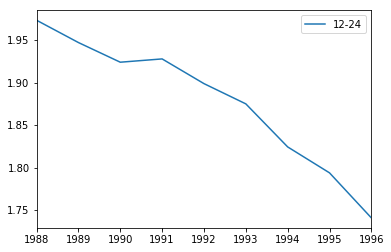

In [22]:
triangle[triangle.development<=24].sum()['CumPaidLoss'].link_ratio.plot();

### Moving back to pandas
When the shape of a `Triangle` object can be expressed as a 2D structure (i.e. two of its four axes have a length of 1), you can use the `to_frame` method to convert your data into a `pandas.DataFrame`.  The `plot` method above is nothing more than a conversion to pandas and using pandas plot.

In [23]:
triangle.groupby('LOB').sum().latest_diagonal['CumPaidLoss'].to_frame().astype(int)

origin,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
comauto,626097,674441,718396,711762,731033,762039,768095,675166,510191,272342
medmal,217239,222707,235717,275923,267007,276235,252449,209222,107474,20361
othliab,317889,350684,361103,426085,389250,434995,402244,294332,191258,54130
ppauto,8690036,9823747,10728411,10713621,11555121,12249826,12600432,11807279,9900842,5754249
prodliab,110973,112614,121255,100276,76059,94462,111264,62018,28107,10682
wkcomp,1241715,1308706,1394675,1414747,1328801,1187581,1114842,962081,736040,340132


### Exercises

In [24]:
# Create a 'NetPaidLossRatio' column in triangle from the existing columns
triangle['NetPaidLossRatio'] = triangle['CumPaidLoss']/triangle['EarnedPremNet']

In [25]:
# What is the highest net paid loss ratio for any observation for origin 1997 Age 12
triangle[triangle.origin==1997][triangle.development==12]['NetPaidLossRatio'].max()

4.769123134328358

In [26]:
# Subset the overall triangle to just include 'Alaska Nat Ins Co'
triangle[triangle['GRNAME']=='Alaska Nat Ins Co']


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(4, 9, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


In [27]:
# Use boolean indexing to create a triangle subset that includes all triangles for companies with names starting with 'B'
triangle[triangle['GRNAME'].str[0]=='B']

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(31, 9, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[BulkLoss, CumPaidLoss, EarnedPremCeded, Earne..."


In [28]:
# Which companies are in the top 5 net premium share for 1990?
triangle[triangle.origin=='1990']['EarnedPremNet'].latest_diagonal.groupby('GRNAME').sum().to_frame().sort_values().iloc[-5:]

FL Farm Bureau Grp                    3e+05
New Jersey Manufacturers Grp          4e+05
Federal Ins Co Grp                    5e+05
United Services Automobile Asn Grp    1e+06
State Farm Mut Grp                    1e+07
dtype: float64

### Initializing a triangle with your own data
The `chainladder.Triangle`  class is designed to ingest `pandas.DataFrame` objects.  However, you do not need to worry about shaping the dataframe into triangle format yourself.  This happens at the time you ingest the data.

Let's look at the initialization signature.

In [29]:
cl.Triangle?

Init signature: cl.Triangle(data=None, origin=None, development=None, columns=None, index=None, origin_format=None, development_format=None, cumulative=None, *args, **kwargs)
Docstring:     
The core data structure of the chainladder package

Parameters
----------
data : DataFrame
    A single dataframe that contains columns represeting all other
    arguments to the Triangle constructor
origin : str or list
     A representation of the accident, reporting or more generally the
     origin period of the triangle that will map to the Origin dimension
development : str or list
    A representation of the development/valuation periods of the triangle
    that will map to the Development dimension
columns : str or list
    A representation of the numeric data of the triangle that will map to
    the columns dimension.  If None, then a single 'Total' key will be
    generated.
index : str or list or None
    A representation of the index of the triangle that will map to the
    index dimens

We will be using the reserve prism test data to construct our triangles.

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/prism.csv')
data.head()

,AccYrMo,ValYrMo,Line,Type,Limit,Deductible,TotalPayment,reportedCount,closedPaidCount,closedUnPaidCount,openCount,Paid,Outstanding,Incurred
0,2008-01,2008-02,Auto,PD,20,1000,0,1,0,1,0,0,0,0
1,2008-01,2008-03,Auto,PD,8,1000,7000,2,1,1,0,7000,0,7000
2,2008-01,2008-03,Auto,PD,15,1000,31018,4,3,1,0,31018,0,31018
3,2008-01,2008-03,Auto,PD,20,1000,8897,1,1,0,0,8897,0,8897
4,2008-01,2008-04,Auto,PD,20,1000,19899,4,4,0,0,19899,0,19899


We must specify the origin, devleopment and columns to create a triangle object.  By limiting our columns to one measure and not specifying an index, we can create a single triangle.

In [31]:
x = cl.Triangle(data=data,
            origin='AccYrMo', development='ValYrMo',
            columns='Paid')
x

Origin,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
2008-01,,,"46,915","19,899","57,216","89,783","18,302","95,054","10,332","91,772",...,,,,,,,,,,
2008-02,,"28,749","22,109","79,033","63,455","59,993","64,683","68,502","33,695","71,670",...,,,,,,,,,,
2008-03,,"48,806","27,949","90,413","54,557","83,507","12,591","72,035","70,353","35,223",...,,,,,,,,,,
2008-04,,"30,758","17,763","70,872","30,233","39,494","66,729","122,100","20,998","38,218",...,,,,,,,,,,
2008-05,,"38,672","86,974","20,483","58,400","112,015","31,354","22,457","53,778","93,303",...,,,,,,,,,,
2008-06,,"56,789","73,351","97,840","64,816","61,083","41,685","87,172","61,418","63,097",...,,,,,,,,,,
2008-07,,"27,867","45,804","61,495","73,279","71,591","111,807","80,249","40,632","32,434",...,,,,,,,,,,
2008-08,"4,832","23,831","52,511","62,649","45,955","133,133","81,733","39,709","112,115","21,367",...,,,,,,,,,,
2008-09,,"43,464","86,157","52,664","89,928","88,738","55,617","26,599","69,522","46,788",...,,,,,,,,,,
2008-10,,"12,488","21,939","53,388","52,415","92,086","45,781","72,242","83,359","47,594",...,,,,,,,,,,


If we want to include more columns or indices we can certainly do so.  Note that as we do so, we move into the 4D arena changing the display of the overall object.

In [32]:
x = cl.Triangle(data=data,
            origin='AccYrMo', development='ValYrMo',
            columns=['Paid', 'Incurred'])
x

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(1, 2, 120, 120)"
Index:,[Total]
Columns:,"[Incurred, Paid]"


Though nothing stops us from using the slicing options above to represent 2D triangles

In [33]:
x['Paid']

Origin,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
2008-01,,,"46,915","19,899","57,216","89,783","18,302","95,054","10,332","91,772",...,,,,,,,,,,
2008-02,,"28,749","22,109","79,033","63,455","59,993","64,683","68,502","33,695","71,670",...,,,,,,,,,,
2008-03,,"48,806","27,949","90,413","54,557","83,507","12,591","72,035","70,353","35,223",...,,,,,,,,,,
2008-04,,"30,758","17,763","70,872","30,233","39,494","66,729","122,100","20,998","38,218",...,,,,,,,,,,
2008-05,,"38,672","86,974","20,483","58,400","112,015","31,354","22,457","53,778","93,303",...,,,,,,,,,,
2008-06,,"56,789","73,351","97,840","64,816","61,083","41,685","87,172","61,418","63,097",...,,,,,,,,,,
2008-07,,"27,867","45,804","61,495","73,279","71,591","111,807","80,249","40,632","32,434",...,,,,,,,,,,
2008-08,"4,832","23,831","52,511","62,649","45,955","133,133","81,733","39,709","112,115","21,367",...,,,,,,,,,,
2008-09,,"43,464","86,157","52,664","89,928","88,738","55,617","26,599","69,522","46,788",...,,,,,,,,,,
2008-10,,"12,488","21,939","53,388","52,415","92,086","45,781","72,242","83,359","47,594",...,,,,,,,,,,


pandas has wonderful datetime inference functionality that the `Triangle` heavily uses to infer origin and development granularity.  Even still, there are rare occassions where date format inferences can fail and it is better to explicitly tell the triangle the date format.

In [34]:
cl.Triangle(data=data,
            origin='AccYrMo', development='ValYrMo',
            columns=['Paid', 'Incurred'],
            origin_format='%Y-%m', development_format='%Y-%m') # Explicit > Implicit
x

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(1, 2, 120, 120)"
Index:,[Total]
Columns:,"[Incurred, Paid]"


Up until now, we've been playing with symmetric triangles, i.e. the origin period and the development period are the same grain.  However, nothing precludes us from having a different grain.  Often times in practice the `development` axis is more granular than the `origin` axis.  All the functionality available to symmetric triangles works equally well for asymmetric triangles.

In [35]:
data['AccYr'] = data['AccYrMo'].str[:4]

x = cl.Triangle(data=data,
            origin='AccYr', development='ValYrMo',
            columns=['Paid', 'Incurred'],
            origin_format='%Y', development_format='%Y-%m')
x

,Triangle Summary
Valuation:,2017-12
Grain:,OYDM
Shape:,"(1, 2, 10, 120)"
Index:,[Total]
Columns:,"[Incurred, Paid]"


While exposure triangles make sense for auditable lines like workers compensation, there are many lines of business where exposure expressed as a 1D vector sufficiently and completely describes the data structure.  `chainladder` arithmetic requires that operations happen between a triangle and either an `int`, `float`, or another `Triangle`.  To create a 1D exposure vector, simply omit the `development` argument at initialization.

In [36]:
data['Premium'] = data['Incurred'] * 3 # Contrived

x = cl.Triangle(data=data,
            origin='AccYrMo',
            columns='Premium',
            origin_format='%Y')
print(type(x))
x

<class 'chainladder.core.triangle.Triangle'>


Origin,Premium
2008-01,"41,872,294"
2008-02,"43,542,684"
2008-03,"35,920,802"
2008-04,"30,521,592"
2008-05,"46,807,611"
2008-06,"35,926,236"
2008-07,"33,305,612"
2008-08,"35,667,952"
2008-09,"36,773,174"
2008-10,"36,858,772"


We have not created triangles with an index yet, but this is easily done by passing the index argument.

In [37]:
x = cl.Triangle(
    data=data,
    origin='AccYrMo',
    development='ValYrMo',
    columns=['Paid', 'Incurred'],
    index='Line', # Add index
    origin_format='%Y', development_format='%Y%m')
x

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(2, 2, 120, 120)"
Index:,[Line]
Columns:,"[Incurred, Paid]"


Just as we are not limited to one single column, we are not limited to a single index either.  Multiple indices can be passed as a list.

In [38]:
x = cl.Triangle(
    data=data,
    origin='AccYrMo',
    development='ValYrMo',
    columns=['Paid', 'Incurred'],
    index=['Line','Type'], # multiple indices
    origin_format='%Y', development_format='%Y-%m')
x

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(2, 2, 120, 120)"
Index:,"[Line, Type]"
Columns:,"[Incurred, Paid]"


### Triangle methods not available in pandas
Up until now, we've kept pretty close to the pandas API for triangle manipulation.  However, there are data transformations commonly applied to triangles that don't have a nice pandas analogy.

For example, the practitioner often wants to convert a triangle from an incremental view into a cumulative view and vice versa.  This is accomplished with the `incr_to_cum` and `cum_to_incr` methods.

Since the cubes store data incrementally, we generally want to accumulate the data after we've ingested into a `Triangle`

In [39]:
x = cl.Triangle(data=data,
            origin='AccYrMo', development='ValYrMo',
            columns='Paid')
x.incr_to_cum()

Origin,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
2008-01,,,"46,915","66,814","124,030","213,813","232,115","327,169","337,502","429,274",...,"13,957,431","13,957,431","13,957,431","13,957,431","13,957,431","13,957,431","13,957,431","13,957,431","13,957,431","13,957,431"
2008-02,,"28,749","50,859","129,891","193,346","253,339","318,022","386,523","420,218","491,888",...,"14,514,228","14,514,228","14,514,228","14,514,228","14,514,228","14,514,228","14,514,228","14,514,228","14,514,228",
2008-03,,"48,806","76,755","167,168","221,724","305,232","317,823","389,858","460,211","495,434",...,"11,973,601","11,973,601","11,973,601","11,973,601","11,973,601","11,973,601","11,973,601","11,973,601",,
2008-04,,"30,758","48,521","119,393","149,626","189,120","255,849","377,949","398,947","437,165",...,"10,173,864","10,173,864","10,173,864","10,173,864","10,173,864","10,173,864","10,173,864",,,
2008-05,,"38,672","125,646","146,129","204,529","316,543","347,897","370,354","424,131","517,435",...,"15,602,537","15,602,537","15,602,537","15,602,537","15,602,537","15,602,537",,,,
2008-06,,"56,789","130,140","227,980","292,796","353,879","395,565","482,736","544,154","607,251",...,"11,975,412","11,975,412","11,975,412","11,975,412","11,975,412",,,,,
2008-07,,"27,867","73,671","135,167","208,446","280,037","391,844","472,093","512,725","545,159",...,"11,101,871","11,101,871","11,101,871","11,101,871",,,,,,
2008-08,"4,832","28,663","81,174","143,824","189,779","322,912","404,645","444,354","556,469","577,837",...,"11,889,317","11,889,317","11,889,317",,,,,,,
2008-09,,"43,464","129,621","182,285","272,213","360,952","416,569","443,168","512,690","559,478",...,"12,257,725","12,257,725",,,,,,,,
2008-10,,"12,488","34,427","87,815","140,229","232,315","278,096","350,338","433,697","481,291",...,"12,286,257",,,,,,,,,


By default (and in concert with the pandas philosophy), the methods associated with the `Triangle` class strive for immutability.  This means that the triangle we just accumulated was thrown away and our original object is incremental.  Many of the `chainladder.Triangle` methods have an `inplace` argument or alternatively you can just use variable reassignment to store the transformation.

In [40]:
# This works
x.incr_to_cum(inplace=True)
# So does this
x = x.incr_to_cum()

When dealing with triangles that have an `origin` axis, `development` axis or both at a monthly or quarterly grain, the triangle can be sumamrized to a higher grain using the `grain` method.

The grain to which you want your triangle converted, specified as 'O*x*D*y*' where *x* and *y* can take on values of ``['Y', 'Q', 'M']``
For example:
* 'OYDY' yields Origin Year/Development Year<br>
* 'OQDM' yields Origin quarter/Development Month<br>

In [41]:
x = x.grain('OYDY')
x

Origin,12,24,36,48,60,72,84,96,108,120
2008,"3,404,254","11,191,085","74,613,012","150,342,751","150,982,873","151,152,726","151,228,872","151,264,806","151,277,217","151,284,217"
2009,"3,609,385","11,002,927","80,726,352","156,970,789","157,599,460","157,697,094","157,736,386","157,743,386","157,748,735",
2010,"4,067,321","12,396,777","74,210,043","161,049,586","161,641,453","161,787,135","161,859,565","161,870,156",,
2011,"4,125,232","13,183,144","81,239,771","161,412,913","162,187,629","162,417,460","162,490,681",,,
2012,"4,584,036","14,001,178","77,794,522","152,118,384","152,588,090","152,819,473",,,,
2013,"4,889,623","14,607,742","84,418,503","161,110,312","161,673,036",,,,,
2014,"5,546,158","16,408,126","77,256,792","154,969,931",,,,,,
2015,"5,909,029","17,427,611","80,914,580",,,,,,,
2016,"6,080,962","18,588,057",,,,,,,,
2017,"6,396,536",,,,,,,,,


Depending on the type of analysis being done, it may be more convenient to look at a triangle with its `development` axis expressed as a valuation rather than an age. To do this, the `Triangle` has two methods for toggling between a development triangle and a valuation triangle.  The methods are `dev_to_val` and its inverse `val_to_dev`

In [42]:
x.dev_to_val()

Origin,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2008,"3,404,254","11,191,085","74,613,012","150,342,751","150,982,873","151,152,726","151,228,872","151,264,806","151,277,217","151,284,217"
2009,,"3,609,385","11,002,927","80,726,352","156,970,789","157,599,460","157,697,094","157,736,386","157,743,386","157,748,735"
2010,,,"4,067,321","12,396,777","74,210,043","161,049,586","161,641,453","161,787,135","161,859,565","161,870,156"
2011,,,,"4,125,232","13,183,144","81,239,771","161,412,913","162,187,629","162,417,460","162,490,681"
2012,,,,,"4,584,036","14,001,178","77,794,522","152,118,384","152,588,090","152,819,473"
2013,,,,,,"4,889,623","14,607,742","84,418,503","161,110,312","161,673,036"
2014,,,,,,,"5,546,158","16,408,126","77,256,792","154,969,931"
2015,,,,,,,,"5,909,029","17,427,611","80,914,580"
2016,,,,,,,,,"6,080,962","18,588,057"
2017,,,,,,,,,,"6,396,536"


When working with real-world data, the triangles can have holes.  A common issue is that subsets of a triangle might be new programs or lines and others more mature.  In these cases, it doesn't make sense to include empty accident periods or development ages for the new/retired line.  For example the 'Home' line has its latest accidents through '2016-03' whereas the 'Auto' program exhibits losses through '2017-12'.  Sometimes, dropping the non-applicable fields is usefule with the `dropna()` method.

In [43]:
x = cl.Triangle(
    data=data,
    origin='AccYrMo',
    development='ValYrMo',
    columns=['Paid'],
    index=['Line']).incr_to_cum().grain('OYDY')
x.loc['Home']

Origin,12,24,36,48,60,72,84,96,108,120
2008,,"1,129,305","61,658,874","136,520,554","136,800,554","136,800,554","136,800,554","136,800,554","136,800,554","136,800,554"
2009,,"187,292","67,134,599","142,267,946","142,547,946","142,547,946","142,547,946","142,547,946","142,547,946",
2010,,"620,603","59,082,456","144,757,200","144,757,200","144,757,200","144,757,200","144,757,200",,
2011,,"503,296","65,048,051","143,971,618","144,251,618","144,251,618","144,251,618",,,
2012,,"599,277","60,536,642","133,412,416","133,412,416","133,412,416",,,,
2013,,"536,303","66,443,157","141,645,782","141,645,782",,,,,
2014,,"965,973","57,394,263","133,542,848",,,,,,
2015,,"371,015","59,047,107",,,,,,,
2016,,"640,179",,,,,,,,
2017,,,,,,,,,,


Note that the `dropna()` method will retain empty periods if they are surrounded by non-empty periods with valid data.

In [44]:
x.loc['Home'].dropna()

Origin,24,36,48,60,72,84,96,108,120
2008,"1,129,305","61,658,874","136,520,554","136,800,554","136,800,554","136,800,554","136,800,554","136,800,554","136,800,554"
2009,"187,292","67,134,599","142,267,946","142,547,946","142,547,946","142,547,946","142,547,946","142,547,946",
2010,"620,603","59,082,456","144,757,200","144,757,200","144,757,200","144,757,200","144,757,200",,
2011,"503,296","65,048,051","143,971,618","144,251,618","144,251,618","144,251,618",,,
2012,"599,277","60,536,642","133,412,416","133,412,416","133,412,416",,,,
2013,"536,303","66,443,157","141,645,782","141,645,782",,,,,
2014,"965,973","57,394,263","133,542,848",,,,,,
2015,"371,015","59,047,107",,,,,,,
2016,"640,179",,,,,,,,


### Commutative properties of Triangle methods
Where it makes sense, (which is in most cases), the methods described above are commutative and can be applied in any order.

In [45]:
print('Commutative? ', x.sum().latest_diagonal == x.latest_diagonal.sum())
print('Commutative? ', x.loc['Auto'].link_ratio == x.link_ratio.loc['Auto'])
print('Commutative? ', x.grain('OYDY').sum() == x.sum().grain('OYDY'))

Commutative?  True
Commutative?  True
Commutative?  True


### Triangle import/export

To the extent the `Triangle` can be expressed as a `pandas.DataFrame`, you can use any of the pandas IO to send the data out.  Note that converting to pandas is a one-way ticket with no inverse functions.

In [46]:
x.sum().to_clipboard() # Automatically converts to a pandas dataframe and puts in the clipboard for pasting in Excel

Alternatively, if you want to store the triangle elsewhere but be able to reconstitute a triangle out of it later, then you can use:
* `Triangle.to_json` and its inverse `cl.read_json` for json format<br>
* `Triangle.to_pickle` and its inverse `cl.read_pickle` for pickle format<br>

These have the added benefit of working on multi-dimensional triangles that don't fit into a DataFrame.

In [47]:
y = x.to_json() # store as JSON string
x == cl.read_json(y) # reconstitute and compare to original object

True

In [48]:
x.to_pickle('triangle.pkl') # store on pickle bytecode
x == cl.read_pickle('triangle.pkl') # reconstitute and compare to original object

True

### Exercises

In [49]:
x = cl.Triangle(
    data=data,
    origin='AccYrMo',
    development='ValYrMo',
    columns=['Paid', 'Incurred'],
    index=['Line', 'Type'], # multiple indices
    origin_format='%Y', development_format='%Y-%m').incr_to_cum()
x

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(2, 2, 120, 120)"
Index:,"[Line, Type]"
Columns:,"[Incurred, Paid]"


In [50]:
# What is the case incurred activity for calendar period 2015Q2 by Line?
y = x.groupby('Line').sum().cum_to_incr()['Incurred'].dev_to_val()
y[y.valuation=='2015Q2'].sum('origin').to_frame().astype(int)

Auto     1883976
Home    10367939
dtype: int32

In [51]:
# What proportion of our Paid come from each 'Type' for Accident year 2015?
count_by_type = x[x.origin=='2015'].latest_diagonal['Paid'].groupby('Type').sum().to_frame()
(count_by_type/count_by_type.sum())

Dwelling    8e-01
PD          2e-01
dtype: float64